In [9]:
import pandas as pd
import zipfile

zip_file_path = 'C:/Users/Konstantin/Downloads/archive.zip'
csv_filename = 'NationalNames.csv' 

def load_data_from_zip(zip_file_path, csv_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

df = load_data_from_zip(zip_file_path, csv_filename)



In [11]:
first_8_rows = df.head(8)
print(first_8_rows)


   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [13]:
last_8_rows = df.tail(8)
print(last_8_rows)


              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [17]:
df.describe()



,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [19]:
unique_names_count = df['Name'].nunique()
print(unique_names_count)


93889


In [21]:
unique_female_names_count = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names_count = df[df['Gender'] == 'M']['Name'].nunique()
print(f'Жіночі: {unique_female_names_count}, Чоловічі: {unique_male_names_count}')


Жіночі: 64911, Чоловічі: 39199


In [23]:
top_5_male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)].nlargest(5, 'Count')[['Name', 'Count']]
print(top_5_male_names_2010)


            Name  Count
1677392    Jacob  22082
1677393    Ethan  17985
1677394  Michael  17308
1677395   Jayden  17152
1677396  William  17030


In [71]:
max_row = df.loc[df['Count'].idxmax()]
most_popular_name = max_row['Name']
year = max_row['Year']
print(f"The name is '{most_popular_name}' in {year}")



The name is 'Linda' in 1947


In [29]:
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print(min_count_records)


254615


In [31]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()
print(unique_names_by_year)


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [33]:
year_with_most_unique_names = unique_names_by_year.idxmax()
print(year_with_most_unique_names)


2008


In [37]:
most_popular_name_in_max_year = df[df['Year'] == year_with_most_unique_names].nlargest(1, 'Count')[['Name']]
print(most_popular_name_in_max_year)


          Name
1608302  Jacob


In [75]:
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_girls = births_per_year_gender[births_per_year_gender['F'] > births_per_year_gender['M']].shape[0]
print(f"Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: {years_more_girls}")


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


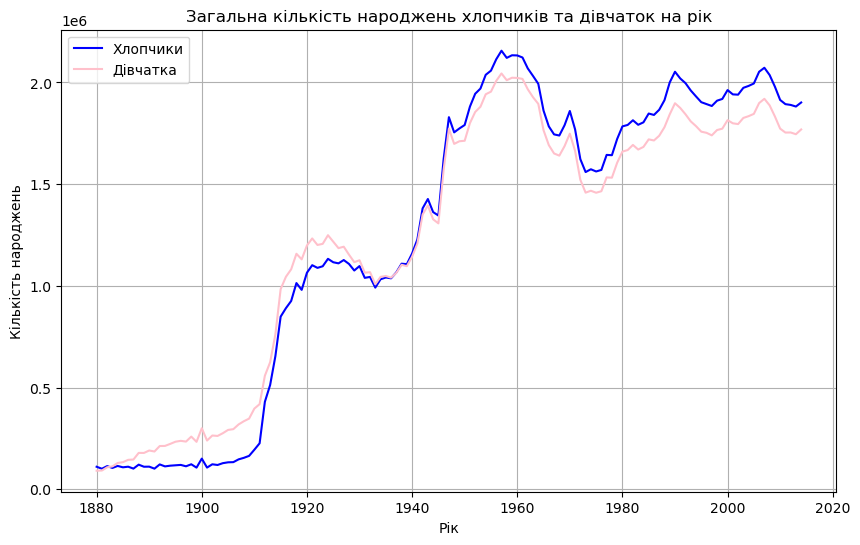

In [77]:
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

plt.figure(figsize=(10, 6))
plt.plot(births_per_year_gender.index, births_per_year_gender['M'], label='Хлопчики', color='blue')
plt.plot(births_per_year_gender.index, births_per_year_gender['F'], label='Дівчатка', color='pink')

plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')

plt.legend()
plt.grid(True)

plt.show()


In [79]:
gender_neutral_names = df.groupby('Name')['Gender'].nunique()
neutral_names_count = gender_neutral_names[gender_neutral_names == 2].count()
print(f"Кількість гендерно нейтральних імен: {neutral_names_count}")

Кількість гендерно нейтральних імен: 10221


In [81]:
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print(f"Хлопчиків, названих 'Barbara': {boys_named_barbara}")

Хлопчиків, названих 'Barbara': 4139


In [85]:
yearly_names = df.groupby(['Year', 'Gender'])['Name'].unique().unstack()
common_names = set(yearly_names.loc[df['Year'].min(), 'M']).intersection(yearly_names.loc[df['Year'].min(), 'F'])
for year in yearly_names.index:
    common_names.intersection_update(set(yearly_names.loc[year, 'M']).intersection(yearly_names.loc[year, 'F']))
print(f"Найпопулярніші гендерно-нейтральні імена, що присутні кожного року: {common_names}")


Найпопулярніші гендерно-нейтральні імена, що присутні кожного року: {'Jessie', 'John', 'Sidney', 'William', 'Leslie', 'Tommie', 'Ollie', 'Francis', 'Robert', 'Johnnie', 'Marion', 'James', 'Lee', 'Jesse', 'Joseph', 'Jean'}


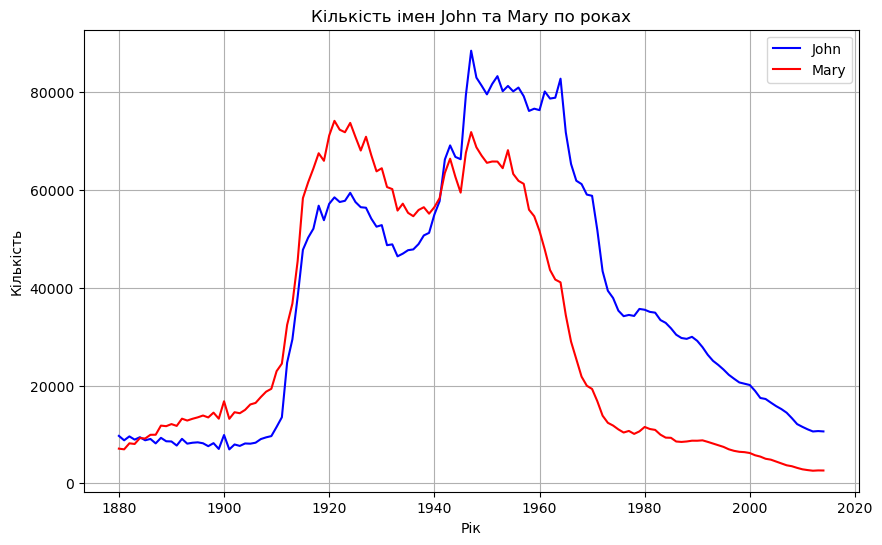

In [87]:
john_df = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_df = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(john_df.index, john_df.values, label='John', color='blue')
plt.plot(mary_df.index, mary_df.values, label='Mary', color='red')
plt.title('Кількість імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
max_count_indices = df.groupby('Year')['Count'].idxmax()
popular_names_each_year = df.loc[max_count_indices]
print(popular_names_each_year[['Year', 'Name', 'Count']])


         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
